In [1]:
import os
import pandas as pd

#print(os.path.dirname(os.path.realpath(__file__)))
raw_data_dir = os.path.join(os.getcwd().replace("/notebooks", ""), "data", "raw")
print(os.listdir(raw_data_dir))

['.DS_Store', 'ACS_variable_descriptions.csv', 'Dept_11-00091', 'Dept_23-00089', 'Dept_35-00103', 'Dept_37-00027', 'Dept_37-00049', 'Dept_49-00009']


In [2]:
#let's just pick one deptartment to get a sense of what is included
dept_num = '49-00009'
dept_dir = os.path.join(raw_data_dir, "Dept_{}".format(dept_num))
print(os.listdir(dept_dir))

['49-00009_ACS_data', '49-00009_Shapefiles']


In [3]:
dept_acs_dir = os.path.join(dept_dir,"{}_ACS_data".format(dept_num))
dept_shp_dir = os.path.join(dept_dir,"{}_Shapefiles".format(dept_num))

print("---ACS directory")
print(os.listdir(dept_acs_dir))
print("\n")
print("---Shapefiles directory")
print(os.listdir(dept_shp_dir))
print("\n")

---ACS directory
['49-00009_ACS_education-attainment', '49-00009_ACS_education-attainment-over-25', '49-00009_ACS_owner-occupied-housing', '49-00009_ACS_poverty', '49-00009_ACS_race-sex-age', '_DS_Store']


---Shapefiles directory
['SPD_BEATS_WGS84.CPG', 'SPD_BEATS_WGS84.dbf', 'SPD_BEATS_WGS84.prj', 'SPD_BEATS_WGS84.sbn', 'SPD_BEATS_WGS84.sbx', 'SPD_BEATS_WGS84.shp', 'SPD_BEATS_WGS84.shp.xml', 'SPD_BEATS_WGS84.shx']




In [4]:
#shapefiles dir has files, but need to traverse ACS dir a little bit more
dept_acs_ed_attainment_dir = os.path.join(dept_acs_dir, "{}_ACS_education-attainment".format(dept_num))
print(os.listdir(dept_acs_ed_attainment_dir))

['ACS_16_5YR_S1501_metadata.csv', 'ACS_16_5YR_S1501_with_ann.csv']


In [5]:
#print(os.path.join(dept_acs_ed_attainment_dir, "ACS_16_5YR_S1501_metadata.csv"))
dept_ed_attainment_meta_df = pd.read_csv(os.path.join(dept_acs_ed_attainment_dir, "ACS_16_5YR_S1501_metadata.csv"))
#dept_ed_attainment_meta_df.head()
dept_ed_attainment_df = pd.read_csv(os.path.join(dept_acs_ed_attainment_dir, "ACS_16_5YR_S1501_with_ann.csv"))
dept_ed_attainment_df.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC02,HC01_MOE_VC02,HC02_EST_VC02,HC02_MOE_VC02,HC03_EST_VC02,HC03_MOE_VC02,HC04_EST_VC02,...,HC02_EST_VC85,HC02_MOE_VC85,HC03_EST_VC85,HC03_MOE_VC85,HC04_EST_VC85,HC04_MOE_VC85,HC05_EST_VC85,HC05_MOE_VC85,HC06_EST_VC85,HC06_MOE_VC85
0,Id,Id2,Geography,Total; Estimate; Population 18 to 24 years,Total; Margin of Error; Population 18 to 24 years,Percent; Estimate; Population 18 to 24 years,Percent; Margin of Error; Population 18 to 24 ...,Males; Estimate; Population 18 to 24 years,Males; Margin of Error; Population 18 to 24 years,Percent Males; Estimate; Population 18 to 24 y...,...,Percent; Estimate; MEDIAN EARNINGS IN THE PAST...,Percent; Margin of Error; MEDIAN EARNINGS IN T...,Males; Estimate; MEDIAN EARNINGS IN THE PAST 1...,Males; Margin of Error; MEDIAN EARNINGS IN THE...,Percent Males; Estimate; MEDIAN EARNINGS IN TH...,Percent Males; Margin of Error; MEDIAN EARNING...,Females; Estimate; MEDIAN EARNINGS IN THE PAST...,Females; Margin of Error; MEDIAN EARNINGS IN T...,Percent Females; Estimate; MEDIAN EARNINGS IN ...,Percent Females; Margin of Error; MEDIAN EARNI...
1,1400000US53033000100,53033000100,"Census Tract 1, King County, Washington",650,184,(X),(X),243,112,(X),...,(X),(X),56316,27883,(X),(X),43929,21865,(X),(X)
2,1400000US53033000200,53033000200,"Census Tract 2, King County, Washington",758,302,(X),(X),392,234,(X),...,(X),(X),70583,31936,(X),(X),40313,23433,(X),(X)
3,1400000US53033000300,53033000300,"Census Tract 3, King County, Washington",117,70,(X),(X),71,45,(X),...,(X),(X),-,**,(X),(X),54025,3330,(X),(X)
4,1400000US53033000401,53033000401,"Census Tract 4.01, King County, Washington",683,265,(X),(X),256,161,(X),...,(X),(X),43984,6628,(X),(X),33750,24472,(X),(X)


In [6]:
## Shapefile
os.listdir(dept_shp_dir)

['SPD_BEATS_WGS84.CPG',
 'SPD_BEATS_WGS84.dbf',
 'SPD_BEATS_WGS84.prj',
 'SPD_BEATS_WGS84.sbn',
 'SPD_BEATS_WGS84.sbx',
 'SPD_BEATS_WGS84.shp',
 'SPD_BEATS_WGS84.shp.xml',
 'SPD_BEATS_WGS84.shx']

In [7]:
import geopandas as gp 
import matplotlib
import descartes

In [8]:
geo_df = gp.read_file(os.path.join(dept_shp_dir, "SPD_BEATS_WGS84.shp"))
geo_df.head()

,objectid,beat,first_prec,st_area_sh,st_length_,geometry
0,1,99,None,2.087731e+08,280794.869698,(POLYGON ((-13623529.36072154 6065172.98920464...
1,2,B1,N,3.888917e+07,30766.975027,POLYGON ((-13626105.45734666 6053091.743454396...
2,3,B2,N,5.514478e+07,32647.183464,POLYGON ((-13621742.58137647 6053118.211499949...
3,4,B3,N,5.961233e+07,36973.284197,POLYGON ((-13618603.47101774 6051912.097496575...
4,5,C1,E,3.255283e+07,37950.240898,POLYGON ((-13615795.63920274 6042902.144891717...


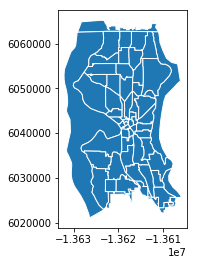

In [10]:
geo_df.plot( edgecolor='white')

In [11]:
geo_df.crs

{'proj': 'merc',
 'lon_0': 0,
 'lat_ts': 0,
 'x_0': 0,
 'y_0': 0,
 'a': 6378137,
 'b': 6378137,
 'units': 'm',
 'no_defs': True}